# Preparing the target tif for the machine learning

### Check the tif files in the folder

Description of the fils in the folder
- Folder : dev_test
- Two type of tif : nicfi and sentinel
- File name format
 - nicfi :  xxxx-YYYY-MM-nicfi.tif   xxxx means the index from 1 digit to 4 digits
 - sentinel : xxxx-YYYYMMDD-sentinel.tif xxxx means the index from 1 digit to 4 digits

- index: the index means they shared same index number index 


In [5]:
### Check the tif files in the folder

# Folder : dev_test
# Two type of tif : nicfi and sentinel
# File name format 
# - nicfi :  xxxx-YYYY-MM-nicfi.tif  xxxx means the index from 1 digit to 4 digits
# - sentinel : xxxx-YYYYMMDD-sentinel.tif xxxx means the index from 1 digit to 4 digits
# index: the index means they shared same index number index

import os
import re
import pandas as pd

# set the path to the folder
folder_path = r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test'

# get the list of files in the folder
list_of_files = os.listdir(folder_path)

# create two empty lists to store the file names
list_of_nicfi = []
list_of_sentinel = []

# loop through the files and separate the two types of tif files
for file in list_of_files:
    if re.search(r'nicfi.tif$', file):
        list_of_nicfi.append(file)
    elif re.search(r'sentinel.tif$', file):
        list_of_sentinel.append(file)

# create two empty lists to store the months
list_of_nicfi_months = []
list_of_sentinel_months = []

# loop through the files and extract the months
for file in list_of_nicfi:
    match = re.search(r'-(\d{4})-(\d{2})-', file)
    if match:
        year, month = match.groups()
        list_of_nicfi_months.append(f"{year}-{int(month)}")

for file in list_of_sentinel:
    match = re.search(r'-(\d{4})(\d{2})\d{2}-', file)
    if match:
        year, month = match.groups()
        list_of_sentinel_months.append(f"{year}-{int(month)}")

# create a dataframe with the months and the count of each type of tif files
all_months = sorted(set(list_of_nicfi_months + list_of_sentinel_months))
df = pd.DataFrame({
    'Month': all_months,
    'Count of Nicfi Image': [list_of_nicfi_months.count(x) for x in all_months],
    'Count of Sentinel Image': [list_of_sentinel_months.count(x) for x in all_months]
})

# print the dataframe
print(df.to_string(index=False))


 Month  Count of Nicfi Image  Count of Sentinel Image
2024-3                  1212                     3636
2024-4                  1212                     3636
2024-5                  1212                     3636


In [4]:
# remove all the files which the date are not the 2024 03 or 2024 04 or 2024 05, which means only the the 3 month data in the folder could be kept and both the nicfi and sentinel files are kept
def filter_tif_files(folder_path):
    """
    Remove TIF files that are not from March, April, or May 2024.
    Handles both NICFI (xxxx-YYYY-MM-nicfi.tif) and Sentinel (xxxx-YYYYMMDD-sentinel.tif) formats.
    
    Args:
        folder_path (str): Path to the folder containing TIF files
        
    Returns:
        tuple: (num_kept, num_removed) - Count of files kept and removed
    """
    kept = 0
    removed = 0
    
    for file in os.listdir(folder_path):
        should_keep = False
        
        if 'nicfi.tif' in file:
            # Handle NICFI format: xxxx-YYYY-MM-nicfi.tif
            match = re.search(r'-(\d{4})-(\d{2})-', file)
            if match:
                year, month = match.groups()
                should_keep = (year == '2024' and month in ['03', '04', '05'])
                
        elif 'sentinel.tif' in file:
            # Handle Sentinel format: xxxx-YYYYMMDD-sentinel.tif
            match = re.search(r'-(\d{4})(\d{2})\d{2}-', file)
            if match:
                year, month = match.groups()
                should_keep = (year == '2024' and month in ['03', '04', '05'])
        
        if not should_keep:
            os.remove(os.path.join(folder_path, file))
            removed += 1
        else:
            kept += 1
                    
    return kept, removed

# Example usage:
folder_path = r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test'
kept, removed = filter_tif_files(folder_path)
print(f"Kept {kept} files")
print(f"Removed {removed} files")





Kept 14544 files
Removed 7152 files


## Show the shape file 's attribute in table 

In [13]:
# show the attribute of the shape file print the name and of the table 
import geopandas as gpd
import pandas as pd

# Read the shapefile
shapefile_path = os.path.join('J1V_Clip', 'fire_nrt_J1VC2_536460_clip.shp')
gdf = gpd.read_file(shapefile_path)

# Convert ACQ_DATE to datetime if it's not already
gdf['ACQ_DATE'] = pd.to_datetime(gdf['ACQ_DATE'])

print("Original dataframe head:")
print(gdf.head())

# Filter points from 2024
filtered_points = gdf[gdf['ACQ_DATE'].dt.year == 2024]

# Count the number of filtered points
num_filtered_points = len(filtered_points)

print(f"\nNumber of points from 2024: {num_filtered_points}")

# Display the filtered points
print("\nFiltered points from 2024:")
print(filtered_points)

Original dataframe head:
   LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK   ACQ_DATE ACQ_TIME SATELLITE  \
0  -8.02880  -79.04613       338.5  0.47   0.64 2020-01-01     1924       N20   
1  -8.02713  -79.04623       338.0  0.47   0.64 2020-01-01     1924       N20   
2  -8.02687  -79.04878       335.3  0.40   0.37 2020-01-03     1848       N20   
3 -17.95334  -70.24676       296.3  0.39   0.36 2020-01-04     0554       N20   
4  -8.02684  -79.04642       336.8  0.45   0.39 2020-01-08     1854       N20   

  INSTRUMENT CONFIDENCE VERSION  BRIGHT_T31  FRP DAYNIGHT  \
0      VIIRS          n  2.0NRT       294.1  2.1        D   
1      VIIRS          n  2.0NRT       294.4  2.4        D   
2      VIIRS          n  2.0NRT       296.1  2.3        D   
3      VIIRS          n  2.0NRT       280.4  0.5        N   
4      VIIRS          n  2.0NRT       304.7  2.4        D   

                      geometry  
0    POINT (-79.04613 -8.0288)  
1   POINT (-79.04623 -8.02713)  
2   POINT (-79.04878 -

## Generate the target tif from the cliped shape and cross with the nicfi tif range


### Generate the target tif 

Requriments:
- Original tif image folder: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test
- Two parameters input: tif file and the shapefile, the input tif file are all nicfi tif files
- One output : the target tif in the target folder: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\target

- Rule : 
  - the tif files name's format xxxx-YYYY-MM-nicfi.tif  xxxx means the index from 1 digit to 4 digits contains the time information
  - the shapefile's attribute have ACQ_DATE is the date of the point data in the shapefile 
  - overlap the shapefile and the tif image and get the points 
  - check the ACQ_DATE of the point data if it match the tif file name then keep , collect all the points overlap the tif range and have same date YYYY-MM is same then do next
  - all the points bu buffer by 100 meter radius to generate the new tif file , the pixels value is the BRIGHTNESS  of acordding to  point, the target tif file have the same size with the nicif tif file, 
  - only the buffered point data will have the values of the BRIGHTNESS based on the point data , the other pixels will be filled with 0 
  - the target tif file save into the target folder and the name is xxxx-YYYY-MM-target.tif  xxxx means the index from 1 digit to 4 digits same as the nicfi tif file

- Method : 
  - Create two functions one function accept two parameters the tif file and the shapefile and return the matix 
  - second function accept the matix and save it to the target folder






In [1]:
# show the raster layer which have one layer and plt the value in color solution
def show_noneBinary_layer(non_b_layer,title="None Binary Layer"):
    plt.figure(figsize=(10, 10))

    plt.imshow(non_b_layer, cmap='viridis')
    cbar = plt.colorbar()
    plt.title(title)
    plt.show()


# define a function to show the tif file by using the 3 bands of the nicfi file 

import rasterio
import matplotlib.pyplot as plt

def show_nicfi_tif(tif_path):
    with rasterio.open(tif_path) as src:
        nicfi_tif = src.read()
        show_noneBinary_layer(nicfi_tif[0])
        show_noneBinary_layer(nicfi_tif[1])
        show_noneBinary_layer(nicfi_tif[2])
    
        plt.figure(figsize=(10, 10))
        plt.imshow(nicfi_tif[0], cmap='viridis', alpha=0.5)
        plt.imshow(nicfi_tif[1], cmap='viridis', alpha=0.5)
        plt.imshow(nicfi_tif[2], cmap='viridis', alpha=0.5)
  
        plt.colorbar()
        # Add a title based on the file name
        plt.title(os.path.basename(tif_path))
        
        
        plt.show()
                        

In [9]:
import os
import rasterio
import geopandas as gpd
import pandas as pd
import numpy as np
from rasterio.features import rasterize
from shapely.geometry import box
from datetime import datetime

def extract_date_from_nicfi_filename(filename):
    """Extract year and month from NICFI filename format."""
    parts = os.path.basename(filename).split('-')
    if len(parts) >= 3:
        return int(parts[1]), int(parts[2])
    return None, None

def process_fire_points(points_gdf, tif_year, tif_month, tif_boundary, verbose=False):
    """Process and filter fire points based on date and boundary."""
    # Convert ACQ_DATE to datetime
    points_gdf['ACQ_DATE'] = pd.to_datetime(points_gdf['ACQ_DATE'])
    
    if verbose:
        print(f"Total points before filtering: {len(points_gdf)}")
    
    # Filter by year and month
    date_filtered = points_gdf[
        (points_gdf['ACQ_DATE'].dt.year == tif_year) & 
        (points_gdf['ACQ_DATE'].dt.month == tif_month)
    ]
    
    if verbose:
        print(f"Points after date filtering: {len(date_filtered)}")
    
    # Filter by spatial boundary
    spatial_filtered = date_filtered[date_filtered.geometry.intersects(tif_boundary)]
    
    if verbose:
        print(f"Points after spatial filtering: {len(spatial_filtered)}")
        if len(spatial_filtered) > 0:
            print("\nPoint dates in filtered data:")
            for idx, row in spatial_filtered.iterrows():
                print(f"Point {idx}: {row['ACQ_DATE']}")
    
    return spatial_filtered

def create_fire_value_raster(tif_path, shapefile_path, buffer_radius_degrees=0.001, verbose=False):
    """
    Create a raster of fire values from points within the TIF extent.
    
    Args:
        tif_path (str): Path to the NICFI TIF file
        shapefile_path (str): Path to the fire points shapefile
        buffer_radius_meters (float): Buffer radius in meters (default: 100)
        verbose (bool): Print processing details
    
    Returns:
        tuple: (numpy array of values, rasterio metadata)
    """
    # Open and read TIF metadata
    with rasterio.open(tif_path) as src:
        meta = src.meta.copy()
        transform = src.transform
        width = src.width
        height = src.height
        bounds = rasterio.windows.bounds(
            rasterio.windows.Window(0, 0, width, height), 
            transform
        )
        tif_boundary = box(*bounds)
        
    # Extract date from filename
    tif_year, tif_month = extract_date_from_nicfi_filename(tif_path)
    if verbose:
        print(f"Processing TIF for {tif_year}-{tif_month}")
    
    # Read shapefile
    points_gdf = gpd.read_file(shapefile_path)
    
    # Ensure matching CRS
    if points_gdf.crs != meta['crs']:
        if verbose:
            print('Converting points CRS to match TIF')
        points_gdf = points_gdf.to_crs(meta['crs'])
    
    # Process points
    filtered_points = process_fire_points(points_gdf, tif_year, tif_month, tif_boundary, verbose)
    
    # Return empty raster if no points found
    if len(filtered_points) == 0:
        if verbose:
            print("No matching points found, returning empty raster")
        return np.zeros((height, width), dtype='float32'), meta
    
    # Calculate buffer in the CRS units
    # current CRS is in degrees : 'EPSG:4326'
    buffer_radius = buffer_radius_degrees  # 0.001 is approximately 100 meters
    
    # Buffer the points
    buffered_points = filtered_points.copy()
    buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)
    
    if verbose:
        print(f"\nCreated {len(buffered_points)} buffered areas")
    
    # Create shapes for rasterization
    shapes = [(geom, float(value)) for geom, value in zip(buffered_points.geometry, buffered_points['BRIGHTNESS']) 
              if not geom.is_empty]
    
    # Rasterize the shapes
    fire_array = rasterize(
        shapes=shapes,
        out_shape=(height, width),
        transform=transform,
        fill=0,
        dtype='float32',
        merge_alg=rasterio.enums.MergeAlg.replace
    )
    
    # Update metadata
    meta.update(dtype='float32', count=1)
    

    if verbose:
        # print the percentage which nonezero pixels
        print(f'Created raster with {np.count_nonzero(fire_array)} non-zero pixels')
        print(f'Value range: {fire_array.min()} to {fire_array.max()}')

        nonzero_percentage = (np.count_nonzero(fire_array) / fire_array.size) * 100
        print(f'Percentage of non-zero pixels: {nonzero_percentage:.2f}%')

        print("\nGeoinformation in metadata:")
        print(f"CRS: {meta['crs']}")
        print(f"Transform: {meta['transform']}")
        print(f"Dimensions: {meta['width']} x {meta['height']}")

        if nonzero_percentage>0:
            show_noneBinary_layer(fire_array)


        
    
    
    return fire_array, meta

def save_fire_raster(array, meta, source_tif_path, target_folder):
    """
    Save the fire raster to the target folder with appropriate naming.
    
    Args:
        array: The raster array to save
        meta: The rasterio metadata
        source_tif_path: Original NICFI TIF path
        target_folder: Output folder path
    """
    # Create target filename
    source_filename = os.path.basename(source_tif_path)
    target_filename = source_filename.replace('-nicfi.tif', '-target.tif')
    target_path = os.path.join(target_folder, target_filename)
    
    # Ensure target directory exists
    os.makedirs(target_folder, exist_ok=True)
    
    # Save the file
    with rasterio.open(target_path, 'w', **meta) as dst:
        dst.write(array, 1)
    
    print(f'Saved target raster to: {target_path}')

# Example usage:
def process_single_tif(tif_path, shapefile_path, target_folder, verbose=False):
    """Process a single TIF file and create corresponding target raster."""
    print(f"\nProcessing: {os.path.basename(tif_path)}")
    
    # Create fire value raster
    fire_array, meta = create_fire_value_raster(
        tif_path=tif_path,
        shapefile_path=shapefile_path,

        verbose=verbose
    )
    
    # Save the result
    save_fire_raster(fire_array, meta, tif_path, target_folder)






Processing: 438-2021-05-nicfi.tif
Processing TIF for 2021-5
Total points before filtering: 623
Points after date filtering: 16
Points after spatial filtering: 2

Point dates in filtered data:
Point 211: 2021-05-23 00:00:00
Point 212: 2021-05-23 00:00:00

Created 2 buffered areas
Created raster with 1712 non-zero pixels
Value range: 0.0 to 335.29998779296875
Percentage of non-zero pixels: 24.85%

Geoinformation in metadata:
CRS: GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
Transform: | 0.00, 0.00,-76.69|
| 0.00,-0.00,-12.51|
| 0.00, 0.00, 1.00|
Dimensions: 83 x 83


C:\Users\lycaz\AppData\Local\Temp\ipykernel_42988\3458558698.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)


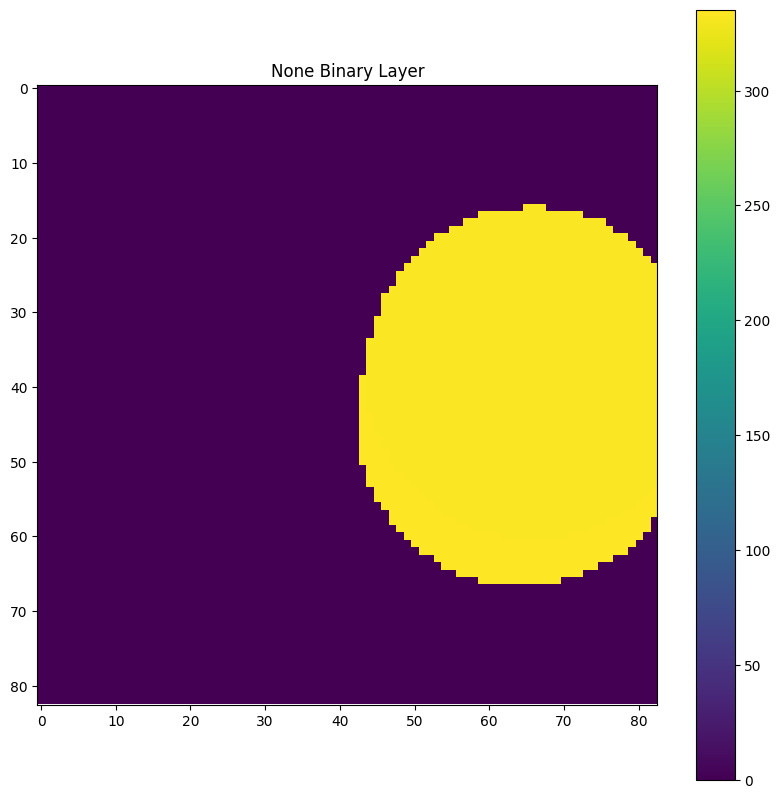

Saved target raster to: example_showcase\438-2021-05-target.tif


In [10]:
# example tif is : Tif_ML\example_showcase\438-2021-05-nicfi.tif
# shaple file path :Tif_ML\J1V_Clip\fire_nrt_J1VC2_536460_clip.shp
# target folder : Tif_ML\example_showcase

# Use forward slashes for paths to avoid escaping issues
example_tif_path = 'example_showcase/438-2021-05-nicfi.tif'
example_shapefile_path = 'J1V_Clip/fire_nrt_J1VC2_536460_clip.shp'
target_folder = 'example_showcase'

# Create the target folder if it doesn't exist
os.makedirs(target_folder, exist_ok=True)

process_single_tif(example_tif_path, example_shapefile_path, target_folder, verbose=True)

## Perform all the file to generate the target